-  Analysis for plumes taken on 190118, only 4 different plumes recorded
-  All are 5s long
-  All plumes are from /Volumes/lab-schaefera/working/marinc/Distance_box/Far_80cm/plume_80cm_180328_5.mat
-  Order are:
   1. 1Hz square pulses from two channels, total flow should be 1
   2. plume on ch3
   3. Anti plume on ch4
   4. Combination of both on Ch3 and Ch4

In [42]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
%matplotlib notebook

In [2]:
flowmeter = sio.loadmat('/Volumes/lab-schaefera/working/warnert/Recordings/Set up recordings/190118/flowmeter_plumes.mat')

In [3]:
for i in flowmeter:
    print(i)

__header__
__version__
__globals__
flowmeter_plumes_Ch31
flowmeter_plumes_Ch5
flowmeter_plumes_Ch4
flowmeter_plumes_Ch3
flowmeter_plumes_Ch2
flowmeter_plumes_Ch1


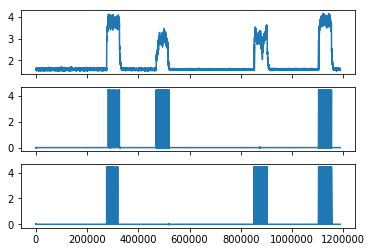

In [4]:
fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(flowmeter['flowmeter_plumes_Ch1'][0][0][-1])
ax[1].plot(flowmeter['flowmeter_plumes_Ch4'][0][0][-1])
ax[2].plot(flowmeter['flowmeter_plumes_Ch5'][0][0][-1])

In [5]:
Ch3 = flowmeter['flowmeter_plumes_Ch4'][0][0][-1]
Ch4 = flowmeter['flowmeter_plumes_Ch5'][0][0][-1]
flow = flowmeter['flowmeter_plumes_Ch1'][0][0][-1]

In [6]:
baseline = np.mean(flow[:276463])
flow = [i-baseline for i in flow]

In [7]:
x = lambda a: 1 if a > 1 else 0
Ch3 = [x(i) for i in Ch3]
Ch4 = [x(i) for i in Ch4]

In [8]:
print(max(Ch3))

1


In [9]:
mix= [i+j for i, j in zip(Ch3, Ch4)]
print(max(mix))

2


In [10]:
found_pulse = False
for index, i in enumerate(mix):
    if i > 0 and not found_pulse:
        print(index)
        found_pulse = True
    if i < 1 and found_pulse:
        print(index)
        break
# Difference in the two, divided by 5 is the fs = 10000

276463
326463


In [11]:
raw_plume = sio.loadmat('/Volumes/lab-schaefera/working/marinc/Distance_box/Far_80cm/plume_80cm_180328_5.mat')

In [12]:
print(len(raw_plume['plume'][0])) # Plume is 5s long

50000


In [13]:
Ch3_plumes_only = Ch3[326500:]
Ch4_plumes_only = Ch4[326500:]
mix_plumes_only = mix[326500:]
flow_plumes_only = flow[326500:]

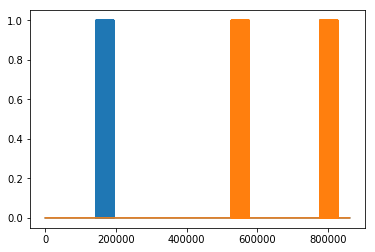

In [14]:
plt.plot(Ch3_plumes_only)
plt.plot(Ch4_plumes_only)

In [15]:
plume_length = 5
fs = 10000
plume_starts = []
last_plume = 0
for index, i in enumerate(mix_plumes_only):
    if i > 0 and index-last_plume > 50000:
        found_plume = True
        plume_starts.append(index)
        last_plume = index


In [16]:
print(len(plume_starts))

3


In [17]:
print(plume_starts)

[143483, 526552, 777451]


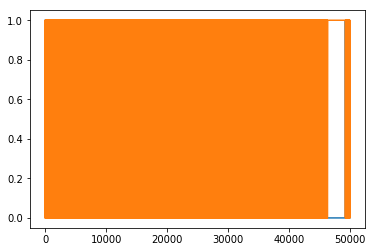

In [18]:
#plt.plot(mix_plumes_only[plume_starts[2]:plume_starts[2]+50000])
plt.plot(Ch3_plumes_only[plume_starts[2]:plume_starts[2]+50000])
plt.plot(Ch4_plumes_only[plume_starts[2]:plume_starts[2]+50000])

143483
50000


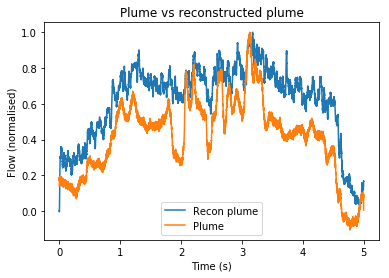

In [19]:
plume_start = plume_starts[0]
plume_end = plume_start + 50000
print(plume_start)

x = np.arange(0, 5, 1/10000)
print(len(x))
plt.plot(x, flow_plumes_only[plume_start:plume_end]/max(flow_plumes_only[plume_start:plume_end]), label='Recon plume')
plt.plot(x, raw_plume['plume'][0]/max(raw_plume['plume'][0]), label='Plume')
plt.ylabel('Flow (normalised)')
plt.title('Plume vs reconstructed plume')
plt.xlabel('Time (s)')
plt.legend()

526552


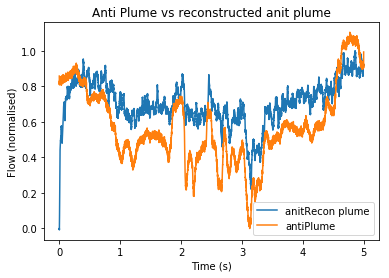

In [20]:
plume_start = plume_starts[1]
plume_end = plume_start + 50000
print(plume_start)

plt.plot(x, flow_plumes_only[plume_start:plume_end]/max(flow_plumes_only[plume_start:plume_end]), label='anitRecon plume')
plt.plot(x, 1-(raw_plume['plume'][0]/max(raw_plume['plume'][0])), label='antiPlume')
plt.ylabel('Flow (normalised)')
plt.title('Anti Plume vs reconstructed anit plume')
plt.xlabel('Time (s)')
plt.legend()

777451


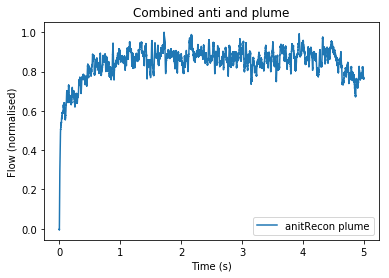

In [21]:
plume_start = plume_starts[2]
plume_end = plume_start + 50000
print(plume_start)

plt.plot(x, flow_plumes_only[plume_start:plume_end]/max(flow_plumes_only[plume_start:plume_end]), label='anitRecon plume')
plt.ylabel('Flow (normalised)')
plt.title('Combined anti and plume')
plt.xlabel('Time (s)')
plt.legend()

## Now repeating the same analysis but with repeats of plumes, and across all channels
-  10 different plumes
-  Order:
    1. Ch1 Plume
    2. Ch2 Plume
    3. Ch3 Plume
    4. Ch4 Plume
    5. Ch1 plume - Ch2 anti plume
    6. Ch3 Plume - Ch4 anti plume
    7. Ch4 anti plume
    8. Ch3 Anti plume
    9. Ch2 Anti plume
    10. Ch1 Anti plume
-  3 Repeats

In [22]:
flowmeter = sio.loadmat('/Volumes/lab-schaefera/working/warnert/Recordings/Set up recordings/190118/flowmeter_plumes_longer_all_chans.mat')

In [23]:
for i in flowmeter:
    print(i)

__header__
__version__
__globals__
flowmeter_plumes_longer_all_chans_Keyboard
flowmeter_plumes_longer_all_chans_Ch4
flowmeter_plumes_longer_all_chans_Ch3
flowmeter_plumes_longer_all_chans_Ch2
flowmeter_plumes_longer_all_chans_Ch1
flowmeter_plumes_longer_all_chans_Flowmete


In [24]:
flow = flowmeter['flowmeter_plumes_longer_all_chans_Flowmete'][0][0][-1]
ch1 = flowmeter['flowmeter_plumes_longer_all_chans_Ch1'][0][0][-1]
ch2 = flowmeter['flowmeter_plumes_longer_all_chans_Ch2'][0][0][-1]
ch3 = flowmeter['flowmeter_plumes_longer_all_chans_Ch3'][0][0][-1]
ch4 = flowmeter['flowmeter_plumes_longer_all_chans_Ch4'][0][0][-1]

In [25]:
push = lambda a: 1 if a > 1 else 0
ch1 = [push(i) for i in ch1]
ch2 = [push(i) for i in ch2]
ch3 = [push(i) for i in ch3]
ch4 = [push(i) for i in ch4]


In [26]:
mix = [i+j+k+l for i, j, k, l in zip(ch1, ch2, ch3, ch4)]

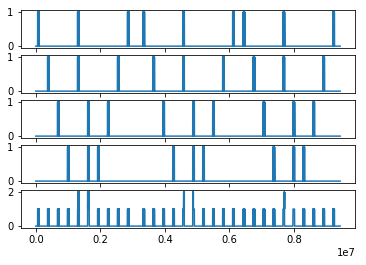

In [27]:
fig, ax = plt.subplots(5, 1)
ax[0].plot(ch1)
ax[1].plot(ch2)
ax[2].plot(ch3)
ax[3].plot(ch4)
ax[4].plot(mix)

In [28]:
plume_starts = []
prev_plume = 0
for index, i in enumerate(mix):
    if i > 0 and index-prev_plume > 50000:
        plume_starts.append(index)
        prev_plume = index

In [29]:
print(len(plume_starts))

30


In [30]:
baseline= np.mean(flow[:plume_starts[0]])
flow_baselined = [i-baseline for i in flow]

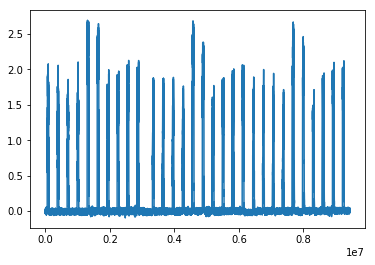

In [31]:
plt.plot(flow_baselined)

<IPython.core.display.Javascript object>


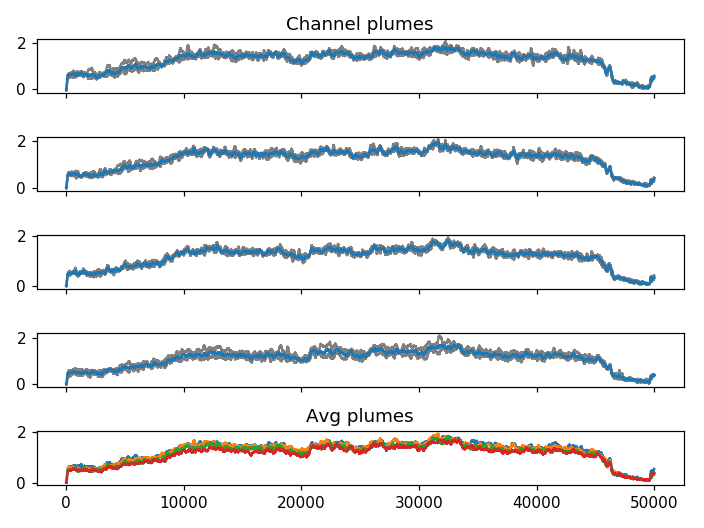

0.0
0.0
0.0
0.0


In [76]:
fig, ax = plt.subplots(5, 1, sharex=True)
avg_chans = []
for i in range(4):
    chn_starts = plume_starts[i::10]
    avg_chan = np.zeros(50000,)
    print(avg_chan[0])
    for j in chn_starts:
        ax[i].plot(flow_baselined[j:j+50000], color='gray')
        avg_chan = [i[0]+j for i, j in zip(flow_baselined[j:j+50000], avg_chan)]
    avg_chan= [i/len(chn_starts) for i in avg_chan]
    ax[i].plot(avg_chan)
    ax[4].plot(avg_chan)
    avg_chans.append(avg_chan)
ax[0].set_title('Channel plumes')
ax[4].set_title('Avg plumes')
plt.tight_layout()

<IPython.core.display.Javascript object>


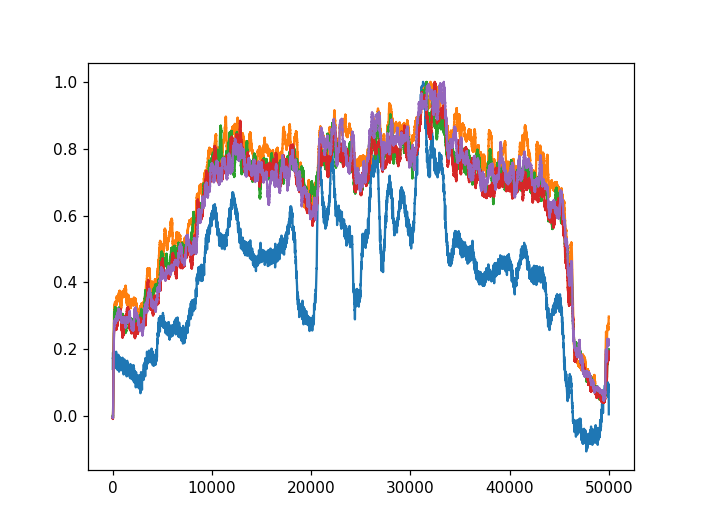

In [77]:
plt.plot(raw_plume['plume'][0]/max(raw_plume['plume'][0]))
for i in avg_chans:
    plt.plot(i/max(i))

<IPython.core.display.Javascript object>


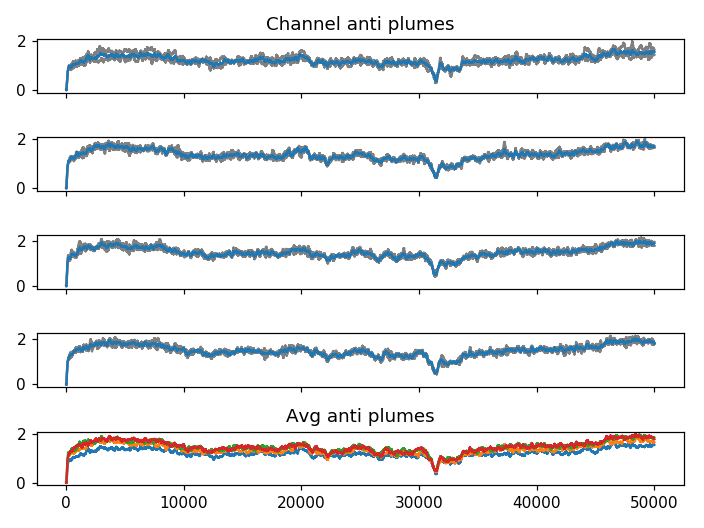

0.0
0.0
0.0
0.0


In [78]:
fig, ax = plt.subplots(5, 1, sharex=True)
avg_anti_chans = []
for i in range(4):
    chn_starts = plume_starts[i+6::10]
    avg_chan = np.zeros(50000,)
    print(avg_chan[0])
    for j in chn_starts:
        ax[i].plot(flow_baselined[j:j+50000], color='gray')
        avg_chan = [i[0]+j for i, j in zip(flow_baselined[j:j+50000], avg_chan)]
    avg_chan= [i/len(chn_starts) for i in avg_chan]
    ax[i].plot(avg_chan)
    ax[4].plot(avg_chan)
    avg_anti_chans.append(avg_chan)
ax[0].set_title('Channel anti plumes')
ax[4].set_title('Avg anti plumes')
plt.tight_layout()

<IPython.core.display.Javascript object>


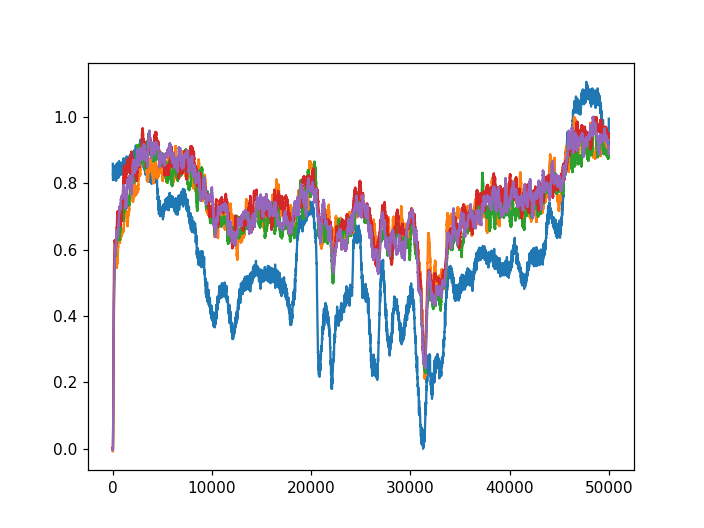

In [87]:
plt.plot(1-(raw_plume['plume'][0]/max(raw_plume['plume'][0])))
for i in avg_anti_chans:
    plt.plot(i/max(i))

<IPython.core.display.Javascript object>


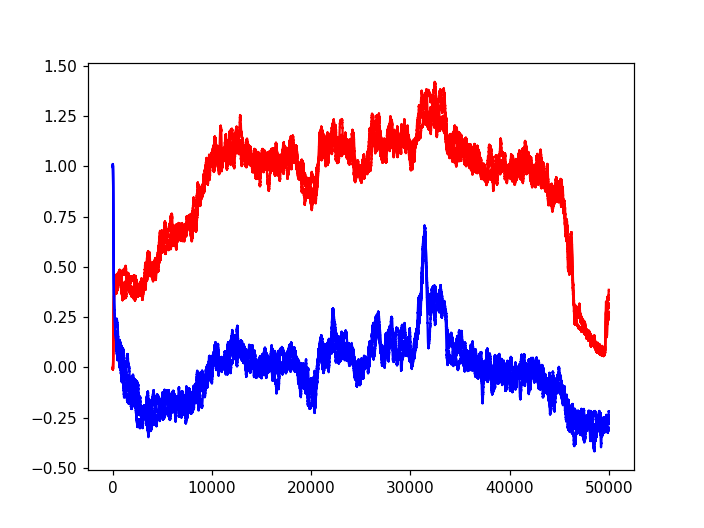

In [93]:
for i, j in zip(avg_chans, avg_anti_chans):
    med_i = np.median(i)
    plt.plot(i/med_i, color='r')
    med_j = np.median(j)
    plt.plot([1-k/med_j for k in j], color='b')

[-0.00557857 -0.00369847 -0.00447263 ...  0.29747743  0.29769862
  0.2979751 ]
50000
[-0.00206818 -0.00280337 -0.00348605 ...  0.20105517  0.2007926
  0.20066131]
50000
[-0.00440357 -0.00531314 -0.00597464 ...  0.18897464  0.19470763
  0.19377051]
50000
[-0.0024581  -0.00346786 -0.00424003 ...  0.2280057   0.22750081
  0.22681774]
50000


4
